In [1]:
import sys
import os
import importlib
import hdf5plugin
import h5py
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251119'
FN = 'date-20251119_grid-100um_condition-testTrackingDistanceToCoords_002.h5'

f = h5py.File(os.path.join(PTH,FN))

In [3]:
f.keys()

<KeysViewHDF5 ['daqmx_ai', 'daqmx_di', 'dist2patch_mm', 'img_metadata', 'img_nir', 'pos_feature', 'pos_stage', 'recording_start']>

In [4]:
d2p = f.get('dist2patch_mm')[:]

In [5]:
d2p.shape

(996,)

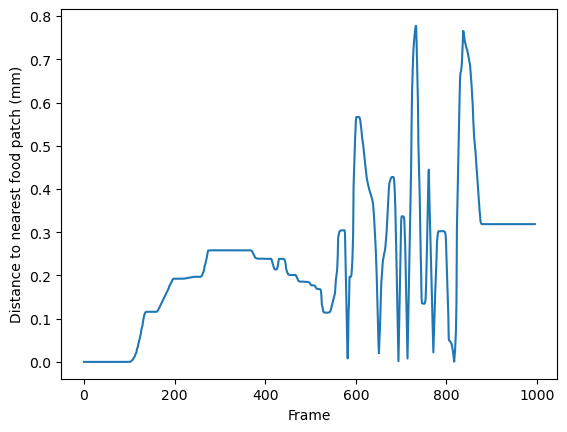

In [6]:
plt.figure()
plt.plot(d2p)
plt.xlabel('Frame')
plt.ylabel('Distance to nearest food patch (mm)')
plt.show()

In [7]:
pos = f.get('pos_stage')[:]

In [8]:
pos.shape

(857, 2)

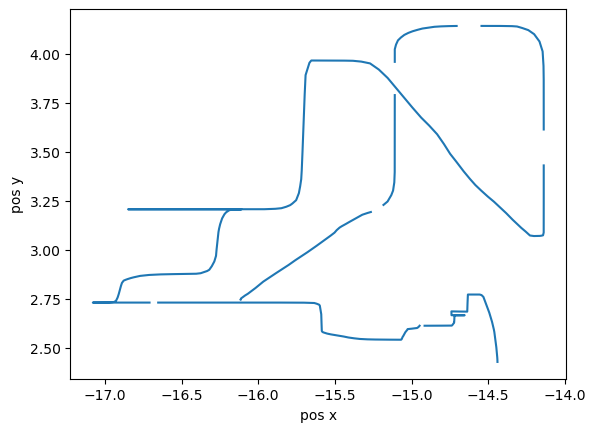

In [9]:
plt.figure()
plt.plot(pos[:,0]/10000,pos[:,1]/10000)
plt.xlabel('pos x')
plt.ylabel('pos y')
plt.show()

In [10]:
im = f.get('img_nir')

In [11]:
dset = f['img_nir']
print(type(dset.id.get_create_plist()))
print(f['img_nir'].id.get_create_plist().get_external_count())



<class 'h5py.h5p.PropDCID'>
0


In [16]:
print(im)
sz = im.shape

<HDF5 dataset "img_nir": shape (857, 732, 968), type "|u1">


In [14]:
im0 = im[0,:,:]

[]

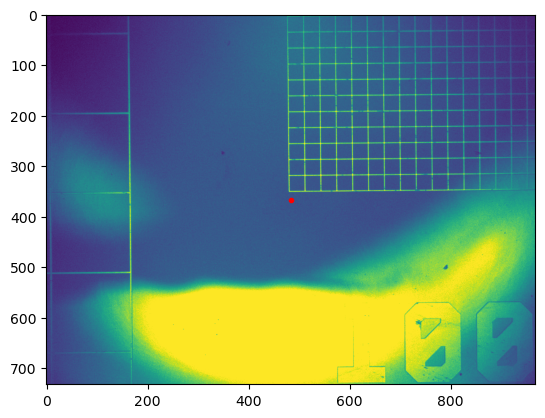

In [ ]:
plt.figure()
plt.imshow(im0)
plt.plot(sz[2]//2,sz[1]//2,'r.')
plt.plot()

`conda activate imgpro`

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251119'
FN = 'date-20251119_grid-100um_condition-testTrackingDistanceToCoords_002.h5'

f = h5py.File(os.path.join(PTH,FN))

im = f.get('img_nir')[:] # THW
sz = im.shape

d2p = f.get('dist2patch_mm')[:]

In [2]:
# add color channel
im = np.stack([im, im], axis=0)

In [3]:
im.shape

(2, 857, 732, 968)

In [4]:
im[1,:,:,:] = 0

ls = 7

redixH = np.arange(sz[2]//2-ls,sz[2]//2+ls)
redixW = np.arange(sz[1]//2-ls,sz[1]//2+ls)
redixH2 = np.arange(sz[2]//2+ls,sz[2]//2-ls,-1)

im[1,:,redixW,redixH] = 255
im[1,:,redixW,redixH2] = 255

im[1,:,:,:] = dilation(im[1,:,:,:])

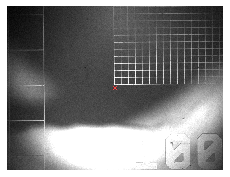

In [5]:
microshow(
    images=im[:,0,:,:], cmaps=['gray','red'], flip_map=False, fig_scaling=3, dpi=72)
plt.show()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1134) to (1504, 1136) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


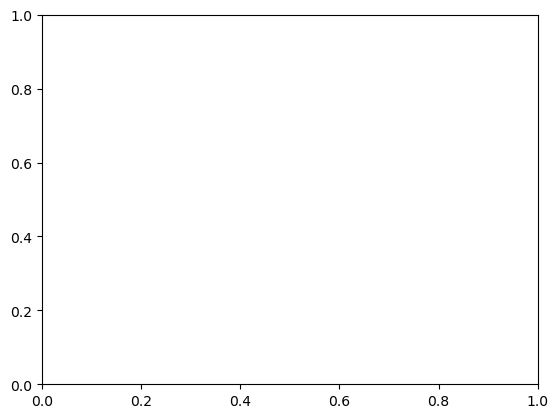

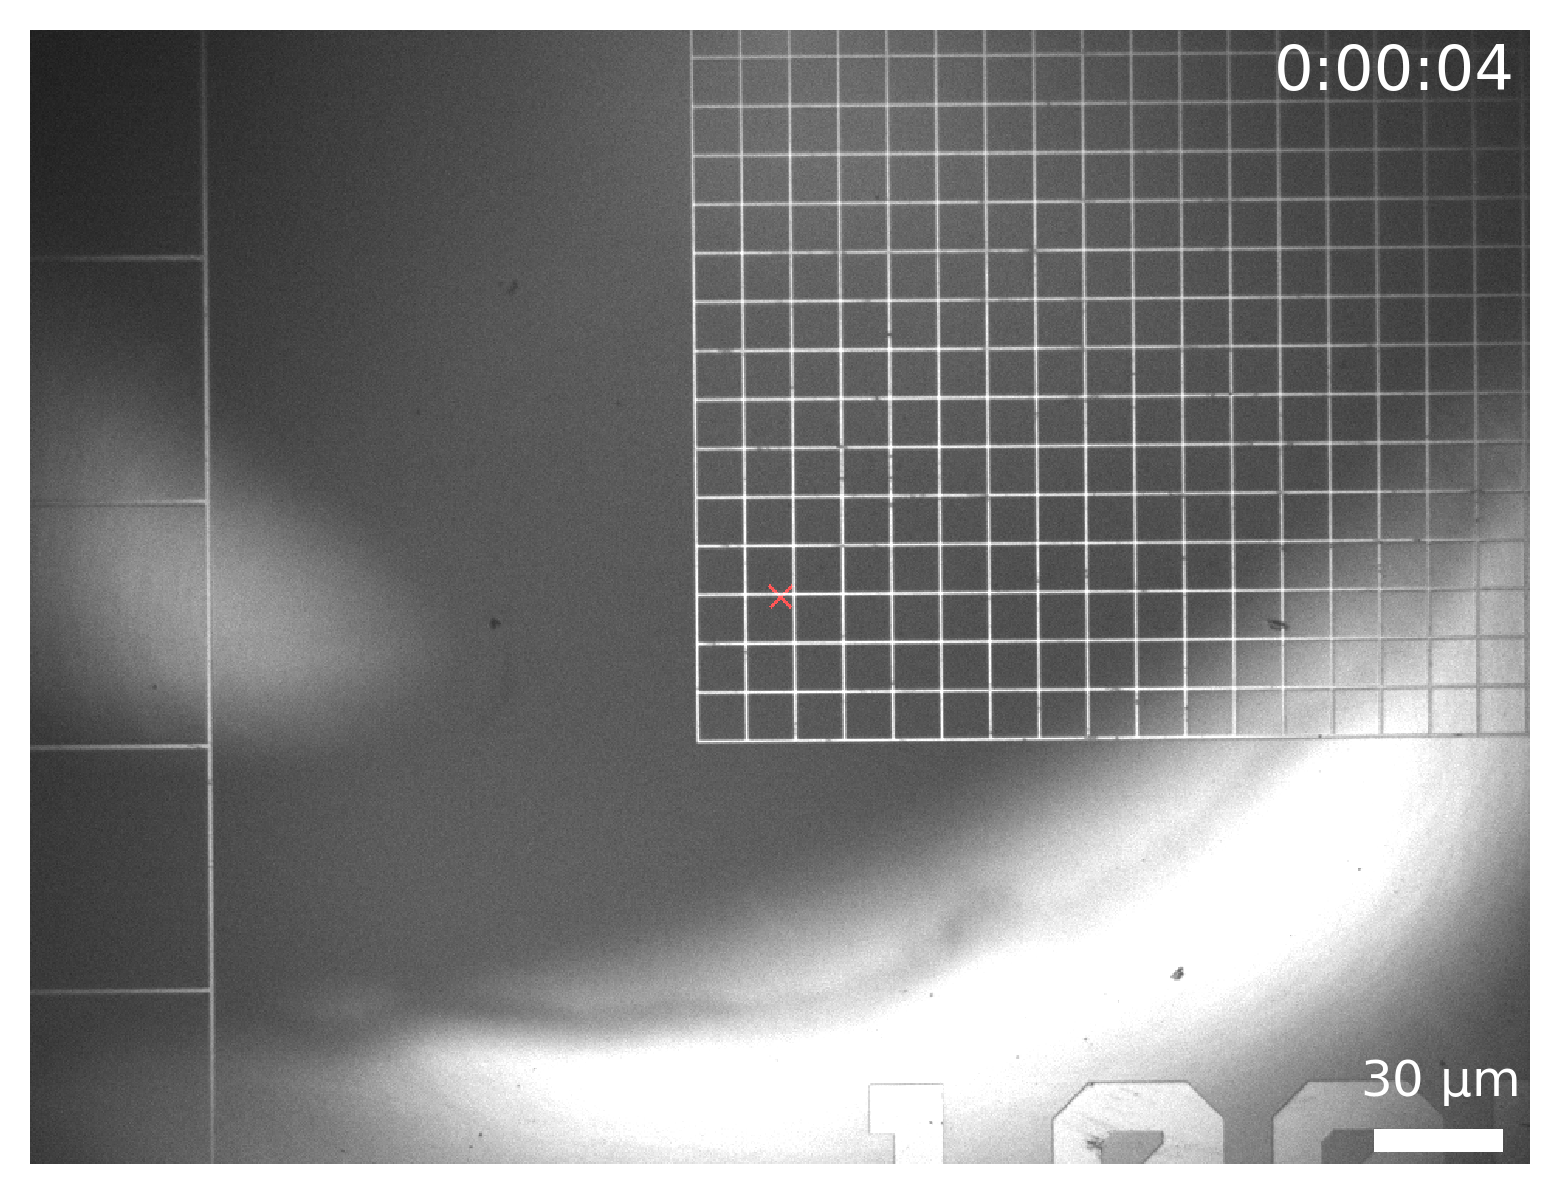

In [ ]:
d = d2p[100:110]

fig,ax = plt.subplots()

anim_output = r"C:\Users\munib\POSTDOC\DATA\g5ht-free\20251119\date-20251119_grid-100um_condition-testTrackingDistanceToCoords_002\d2p.mp4"
%matplotlib inline
anim = Microanim(
    im[:,100:110,:,:], cmaps=['gray','red'], flip_map=False, fig_scaling=5, dpi=300,
    unit='um', scalebar_unit_per_pix=0.36, scalebar_size_in_units=30,
    scalebar_thickness=0.02, scalebar_font_size=12, rescale_type='limits', limits=[0,256], ax=ax)
anim.add_time_stamp(unit='mmm', unit_per_frame=533, location='upper right')
anim.save_movie(anim_output, quality=10, fps=10)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1134) to (1504, 1136) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


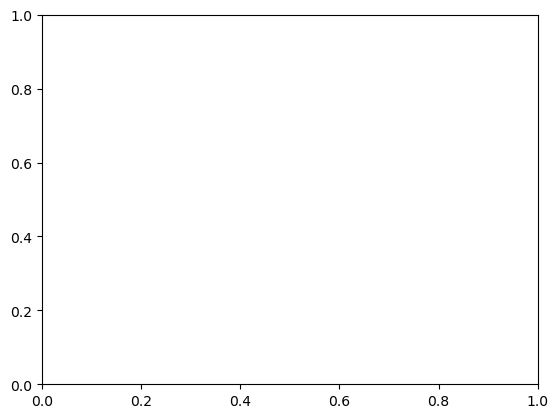

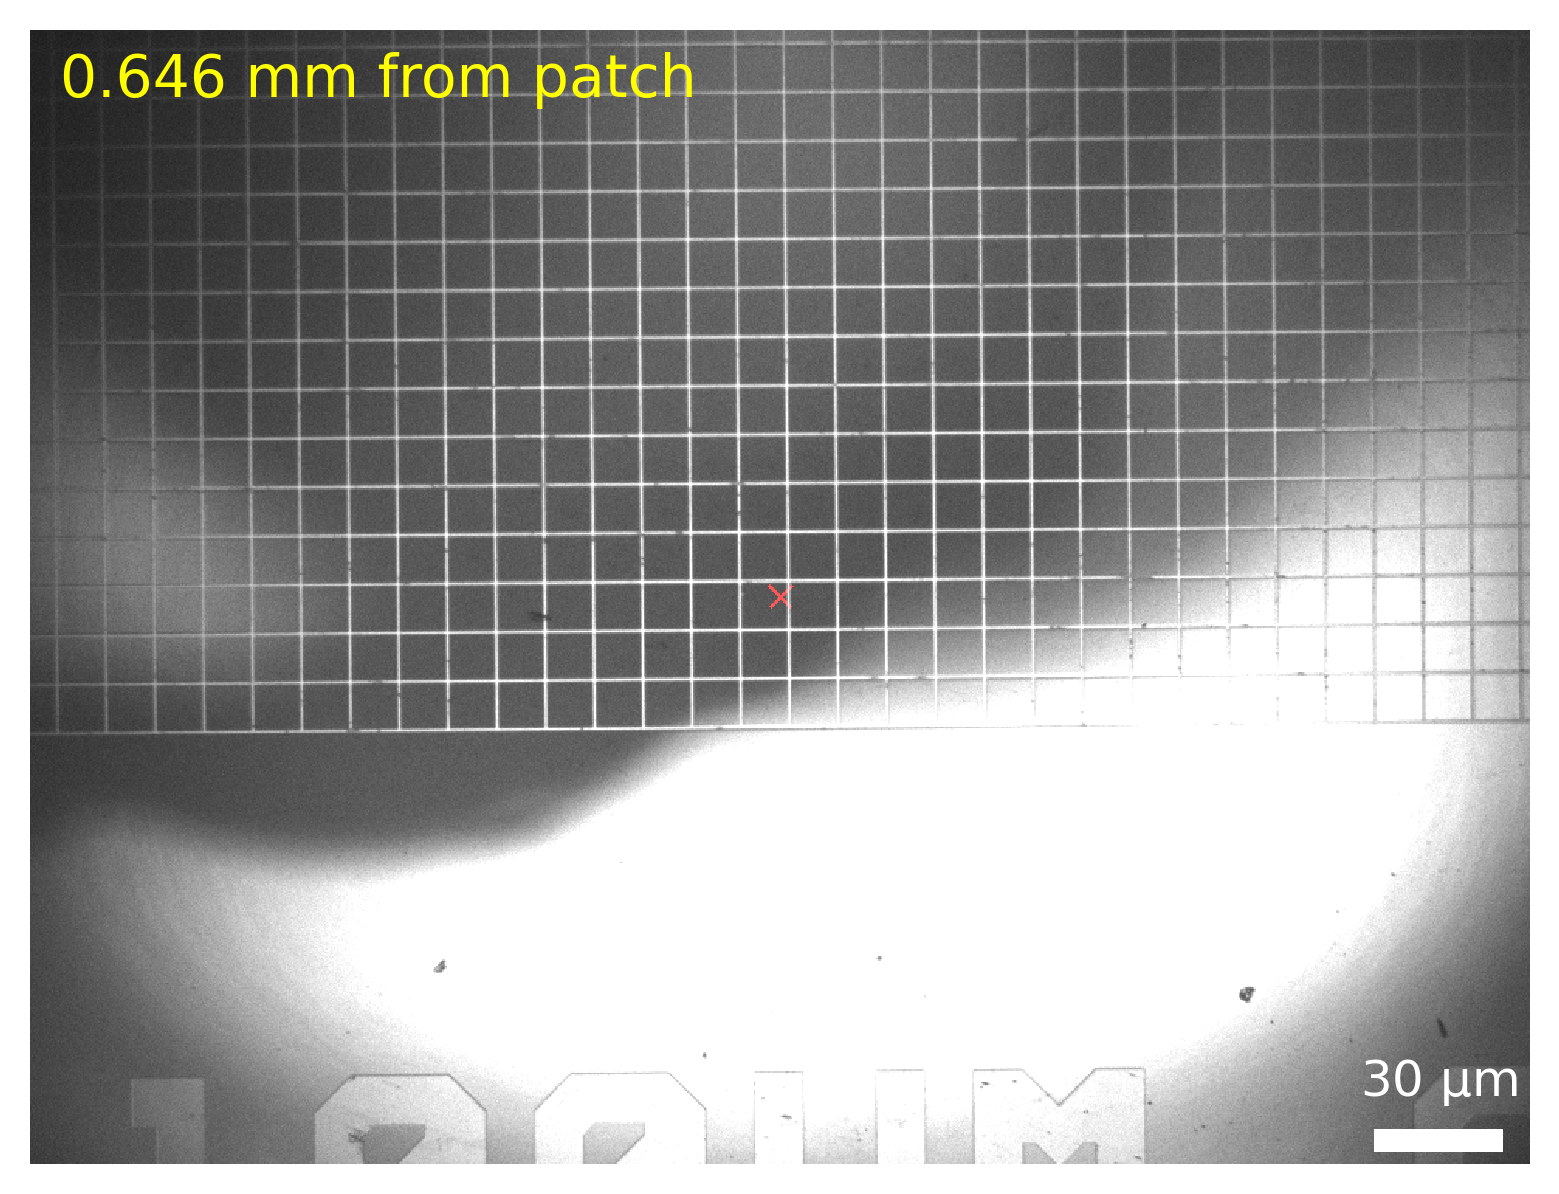

In [14]:
d = d2p[0:858]   # values to overlay
dstr = [str(np.round(x,3)) + ' mm from patch' for x in d]

fig, ax = plt.subplots()

anim = Microanim(
    im,
    cmaps=['gray','red'],
    flip_map=False,
    fig_scaling=5,
    dpi=300,
    unit='um',
    scalebar_unit_per_pix=0.36,
    scalebar_size_in_units=30,
    scalebar_thickness=0.02,
    scalebar_font_size=12,
    rescale_type='limits',
    limits=[0,256],
    ax=ax
)

anim.add_text_overlay(dstr, xpos=0.02, ypos=0.93, color='yellow', fontsize=14)

anim_output = r"C:\Users\munib\POSTDOC\DATA\g5ht-free\20251119\date-20251119_grid-100um_condition-testTrackingDistanceToCoords_002\d2p.mp4"
anim.save_movie(anim_output, quality=10, fps=10)
